In [38]:
import kaggle 



In [39]:
!kaggle datasets download -d yasserh/housing-prices-dataset



Dataset URL: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset
License(s): CC0-1.0
housing-prices-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [40]:
import zipfile
with zipfile.ZipFile("housing-prices-dataset.zip","r") as zipf:
    zipf.extractall(".")
    

In [41]:
import pandas as pd

In [42]:
df = pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [43]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [56]:
numerical_data = df.select_dtypes(include=["number"])
catagorical_data = df.select_dtypes(include = ["object","bool"]).columns
# numerical_data
catagorical_data

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [45]:
import matplotlib.pyplot as plt

<Axes: >

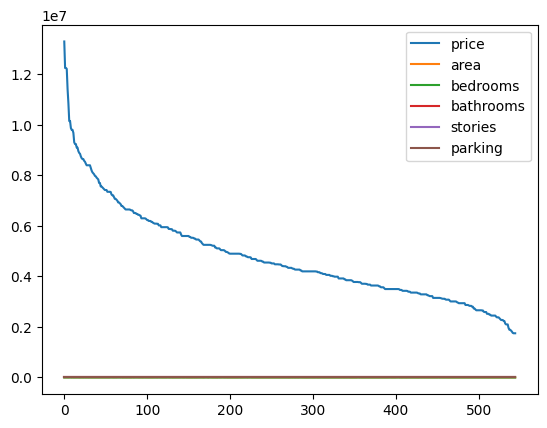

In [46]:
numerical_data.plot()

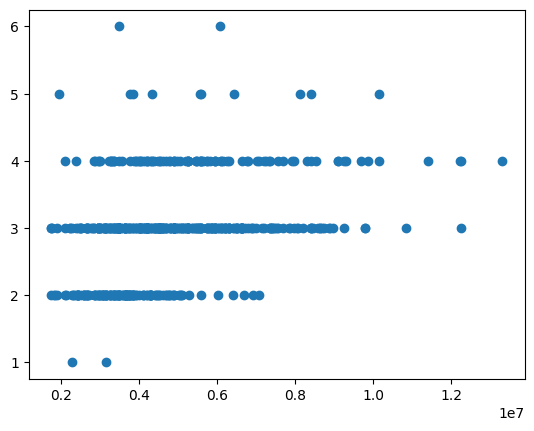

In [47]:
plt.scatter('price','bedrooms',data =numerical_data)


        price      area  bedrooms  bathrooms   stories   parking
0    4.566365  1.046726  1.403419   1.421812  1.378217  1.517692
1    4.004484  1.757010  1.403419   5.405809  2.532024  2.679409
2    4.004484  2.218232  0.047278   1.421812  0.224410  1.517692
3    3.985755  1.083624  1.403419   1.421812  0.224410  2.679409
4    3.554979  1.046726  1.403419   0.570187  0.224410  1.517692
..        ...       ...       ...        ...       ...       ...
540  1.576868  0.991879  1.308863   0.570187  0.929397  1.517692
541  1.605149  1.268613  0.047278   0.570187  0.929397  0.805741
542  1.614327  0.705921  1.308863   0.570187  0.929397  0.805741
543  1.614327  1.033389  0.047278   0.570187  0.929397  0.805741
544  1.614327  0.599839  0.047278   0.570187  0.224410  0.805741

[545 rows x 6 columns]


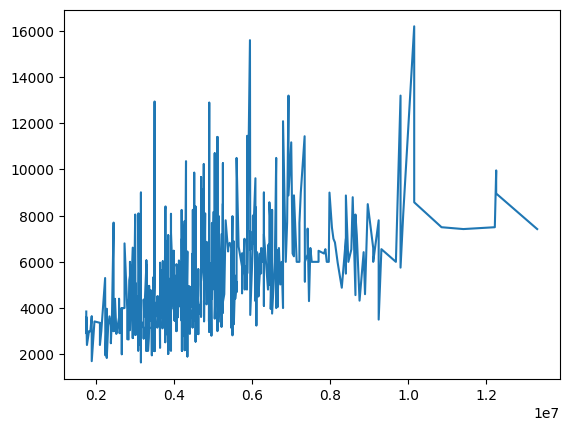

In [73]:
# import seaborn as sb
plt.plot(numerical_data['price'],numerical_data['area'])
from scipy import stats
z_score = stats.zscore(numerical_data)

absolute = abs(z_score)
print(absolute)
remove = (absolute<3)
df = df[remove]

In [49]:
import seaborn as sb

In [50]:
# plt.figure(figsize=(13,10))
# correlation = numerical_data.corr()
# mul = np.dot(correlation,correlation)
# sb.heatmap(correlation,annot=True)
# sum = 0.0
# for i in range(1,6):
#     sum += mul.values[0][i]

In [51]:
hot_encoding = pd.get_dummies(catagorical_data)
hot_encoding.head()

,airconditioning,basement,furnishingstatus,guestroom,hotwaterheating,mainroad,prefarea
0,False,False,False,False,False,True,False
1,False,False,False,True,False,False,False
2,False,True,False,False,False,False,False
3,False,False,False,False,True,False,False
4,True,False,False,False,False,False,False


In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in catagorical_data:
    df[col] = le.fit_transform(df[col])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [66]:
from sklearn.preprocessing import OrdinalEncoder
age ={"age":['man','child','man','old','teen','young','old','teen','old','man']}
df = pd.DataFrame(age)
order=['child','teen','young','man','old']
oe =OrdinalEncoder(categories=[order])
df["age"]=oe.fit_transform(df[["age"]])
df


,age
0,3.0
1,0.0
2,3.0
3,4.0
4,1.0
5,2.0
6,4.0
7,1.0
8,4.0
9,3.0


In [67]:
data = {
    'color': ['red', 'blue', 'green', 'blue', 'red'],
    'size': ['S', 'M', 'L', 'S', 'M']
}
df = pd.DataFrame(data)
hot_encoded_df = pd.get_dummies(df)
print(hot_encoded_df)

   color_blue  color_green  color_red  size_L  size_M  size_S
0       False        False       True   False   False    True
1        True        False      False   False    True   False
2       False         True      False    True   False   False
3        True        False      False   False   False    True
4       False        False       True   False    True   False


In [68]:
hot_encoded_df = pd.get_dummies(df, prefix=['color', 'size'], prefix_sep=':')
print(hot_encoded_df)

   color:blue  color:green  color:red  size:L  size:M  size:S
0       False        False       True   False   False    True
1        True        False      False   False    True   False
2       False         True      False    True   False   False
3        True        False      False   False   False    True
4       False        False       True   False    True   False


In [71]:
df_with_nan = df.copy()
df_with_nan.loc[2, 'color'] = None
hot_encoded_df = pd.get_dummies(df_with_nan, dummy_na=True)
print(hot_encoded_df)

   color_blue  color_red  color_nan  size_L  size_M  size_S  size_nan
0       False       True      False   False   False    True     False
1        True      False      False   False    True   False     False
2       False      False       True    True   False   False     False
3        True      False      False   False   False    True     False
4       False       True      False   False    True   False     False
